# Análise Exploratória de Dados & Apresentação de Insights 

## [gabarito] Características de bons vinhos

___________

### Contexto

Você acaba de ser contratado como gerente de compras em um e-commerce de vinhos. Para obter sucesso em vendas, você precisará aprender algumas coisas sobre esse maravilhoso produto e sobre o portal antes de apostar em uma nova negociação. Existem diversos caminhos:
- Ler [artigos](http://vidaevinho.com/como-escolher-um-bom-vinho-2/) e livros sobre o tema;
- Assistir a documentários;
- Analisar dados!
    Como encontrar um padrão, relação ou anomalia? Como criar nossa própria definição de qualidade?


### Objetivo 

**Perguntas que queremos responder**

1. Qual o limiar para a baixa, média e alta qualidade?
1. Dado a definição de boa qualidade, quais características estão atreladas a ela?

### Resultados

1. Trouxemos a média de cada cada característica agrupando por nota de qualidade e analisando os gráficos entedemos que:
    * Quanto menor a acidez volátil (`volatile acidity`), maior a qualidade do vinho;
    * Quanto maior a acidez cítrica (`citric acid`), maior a qualidade do vinho;
    * Quanto maior o álcool (`alcohol`), maior a qualidade do vinho;
    * Quanto maior o sulfato (`sulphates`), maior a qualidade do vinho.

Não calculamos o grau desta relação.

2. Essas características levantadas não possuem correlação entre si, por isso será importante analisar as quatro em conjunto.

### Conclusão

___________

### Análise Exploratória de Dados (EDA)

#### 0. Obtendo os dados

In [2]:
import pandas as pd

# Seaborn visualization library
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("data/red-wine-quality-cortez-et-al-2009.zip")

#### ♣ Dúvidas
1. Precisamos entender o que as variáveis significam para fazer uma boa análise?
2. Daremos conta de analisar todas as variáveis deste dataset?

In [4]:
df.head() #df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 1. Overview da base de dados

#### ♣ Dúvidas
1. Como esse dataset está estruturado? Ele está arrumado?
1. Qual a variável que irá nos indicar a qualidade do vinho? Podemos criar algo a partir dela?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
pwd

'/Users/marianubie/workspace/data-science-abril-19/11-exploratory-analysis'

##### 1.1 Medidas de tendência central e dispersão 

#### ♣ Dúvidas
1. Sobre a variável que indica a qualidade do vinho:
    * Como está a sua distribuição? E qual a melhor maneira de visualizar uma distribuição?
        * Essa distribuição tem um nome?
        * Por que é importante saber isso?
    * Qual o tipo desta variável... E por que é importante saber isso?!
    * Existem outliers?
1. Sobre as demais variáveis:
    * Como são as distribuições delas? Quais a melhores maneiras de visualizá-las?
    * Quais os diferentes tipos que temos? 
    * Existem outliers?
    
![Tipos de variáveis](imgs/tipos_de_variaveis.jpg)

In [6]:
df["is_good"] = False
df.loc[df.quality>=6, "is_good"] = True

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


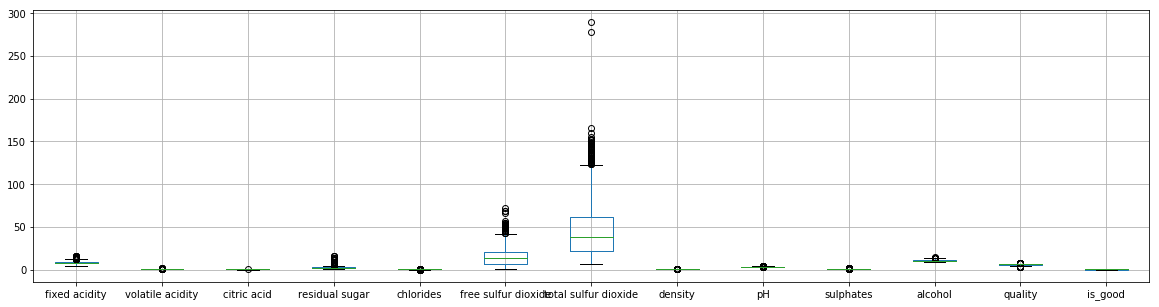

In [8]:
df.boxplot(figsize=(20, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1152bbac8>,
      dtype=object)

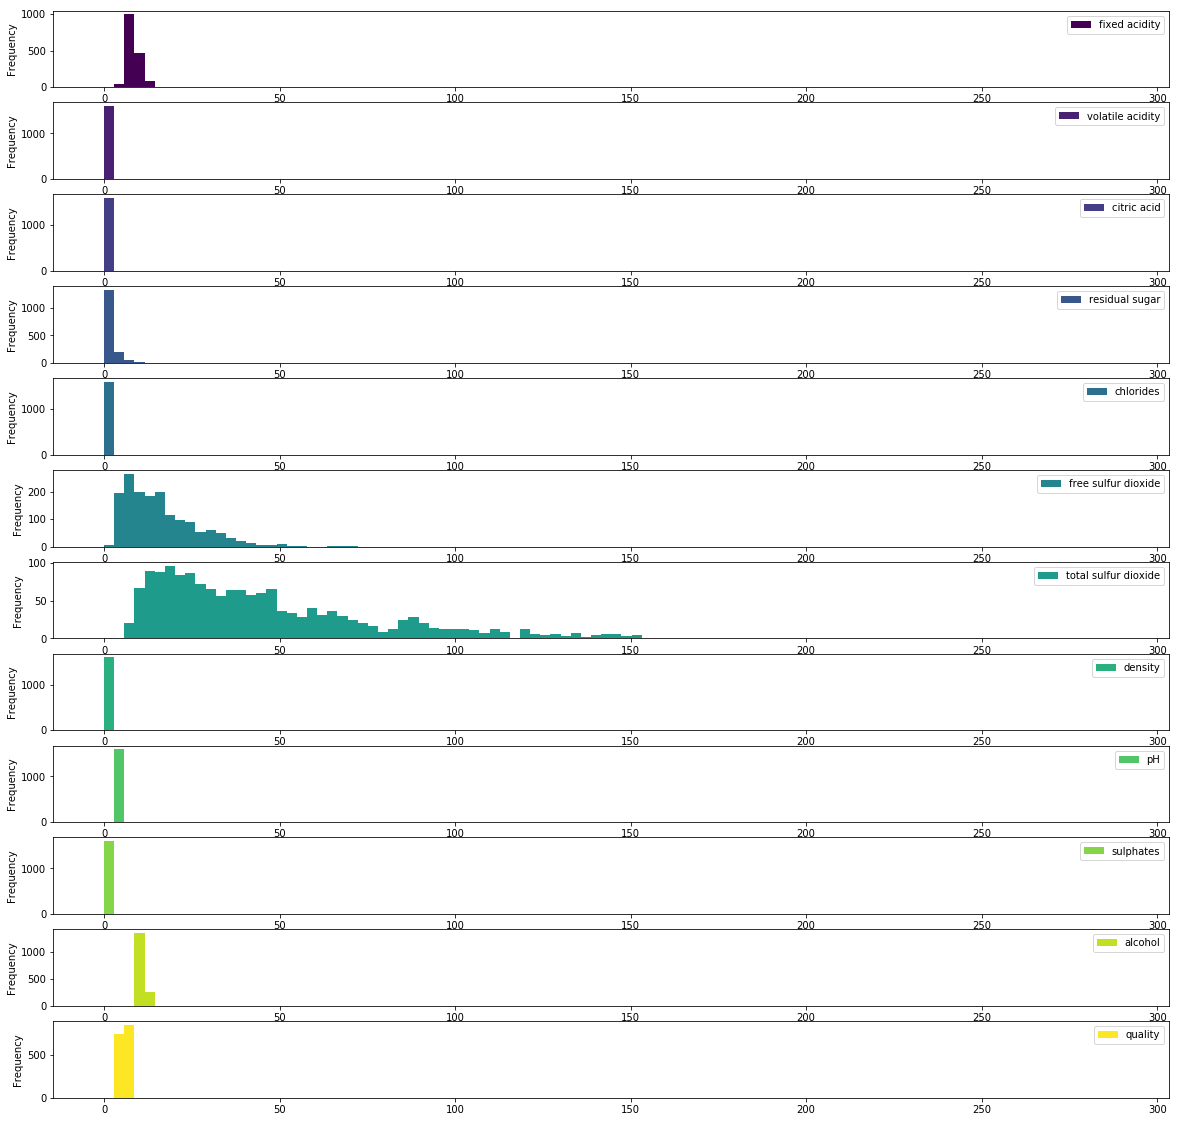

In [9]:
# Histogramas
df.plot(kind="hist", subplots=True, figsize=(20,20), sharex=False, sharey=False, bins=100, colormap="viridis")

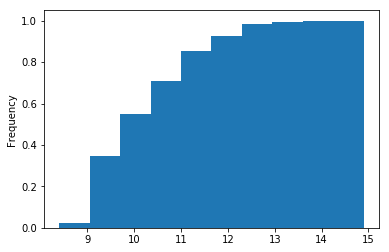

In [10]:
# Mais sobre histogramas
df.alcohol.plot.hist(density=True, cumulative=True)

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df.is_good.value_counts()

True     855
False    744
Name: is_good, dtype: int64

#### 2. Estudando a relação entre as características do vinho e a qualidade

#### ♣ Dúvidas

1. Dado os nossos diferentes tipos de variáveis, qual a melhor maneira de entender qual está relacionado com a variável de qualidade?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e7c400>,
      dtype=object)

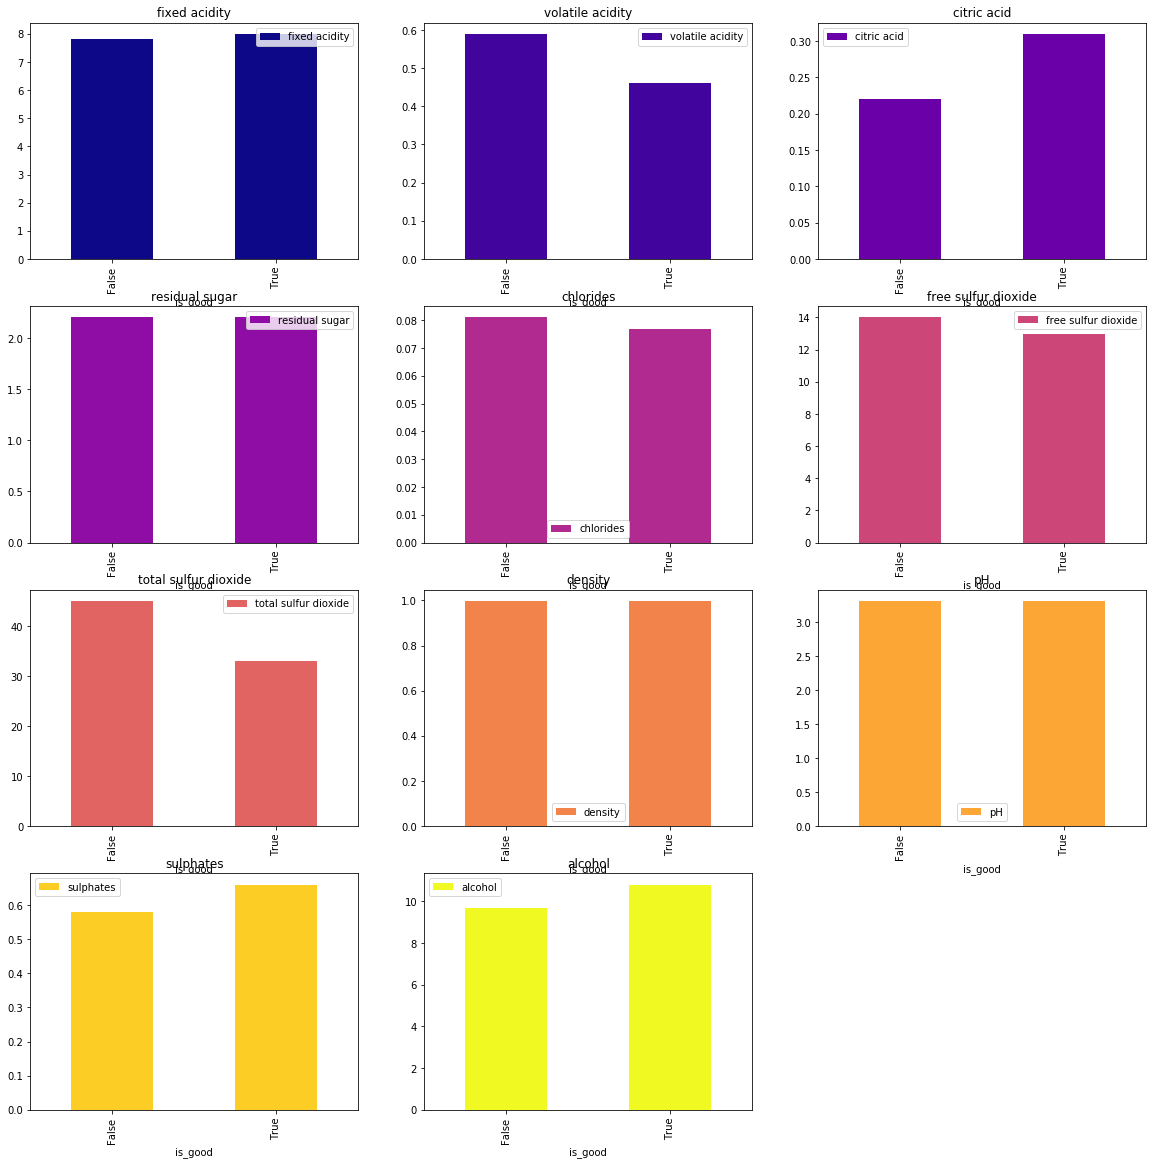

In [13]:
df.groupby("is_good")[['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide', 
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol']].median().plot(kind="bar", subplots=True, layout=(4,3), 
                                                 sharex=False, legend=True, figsize=(20,20), 
                                                 colormap="plasma", )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117379710>,
      dtype=object)

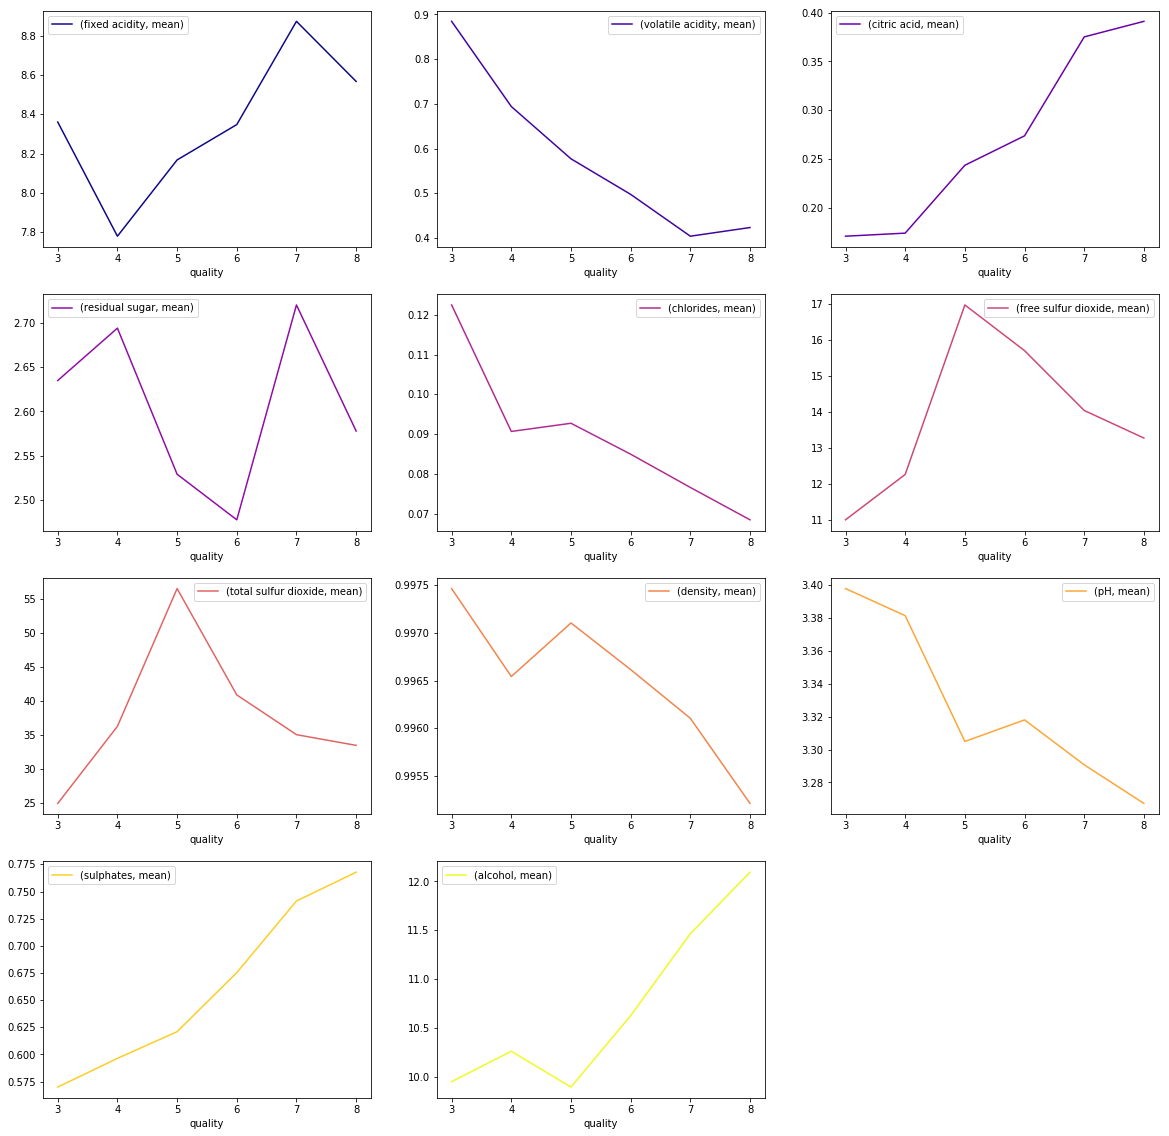

In [14]:
df.groupby("quality")[['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide', 
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol']].agg(['mean']).plot(kind="line", subplots=True, layout=(4,3), 
                                                 sharex=False, legend=True, figsize=(20,20), 
                                                 colormap="plasma")

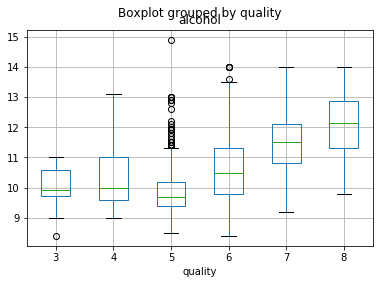

In [15]:
df.boxplot(column="alcohol", by="quality")

#### 3. Estudando outras variáveis

##### Correlações
* **Correlação é a interdependência entre duas ou mais variáveis.** Elas podem implicar causalidade... [ou não](https://tylervigen.com/spurious-correlations).
    * Exemplos de correlações _lineares positivas_:
        * Quanto maior o preço, maior a qualidade de um vinho;
        * Quanto maior o tempo de amadurecimento, maior a qualidade de um vinho;
        * Quanto maior o tempo de amadurecimento, maior o preço.
    * Exemplos correlações _lineares negativas_:
        * Quanto maior o rendimento por hectare, menor o preço de um vinho.
        > Um vinho feito a partir de um vinhedo que rende 5 toneladas de uva por hectare provavelmente será mais caro do que um que vem de um vinhedo que rende 20 toneladas. **Fonte:** [10 razões para um vinho ser caro](https://www.huffpostbrasil.com/tania-nogueira/10-razoes-para-um-vinho-ser-caro_a_21681009).

* **Como medir a intensidade dessa interdependência?**
    * O que tem uma correlação maior: O tempo de amadurecimento no barril de carvalho e a qualidade, ou o preço da mão-de-obra e a qualidade?
    > Em Portugal, por exemplo, a mão-de-obra ainda é mais barata do que em outros países europeus, como França ou Alemanha. E os vinhos feitos por lá são maravilhosos. A mão-de-obra na Argentina é mais barata do que na Austrália e os vinhos dos dois países têm níveis parecidos. **Fonte:** [10 razões para um vinho ser caro](https://www.huffpostbrasil.com/tania-nogueira/10-razoes-para-um-vinho-ser-caro_a_21681009).
       
       * **Coeficiente de correlação de Pearson** (linear) 
           * Quanto a relação de duas variáveis pode ser descrita por uma reta (taxa constante)? [-1; 1]
       * **Coeficiente de correlação de Kendall** (não linear)
           * ?
       * **Coeficiente de correlação de Spearman** (não linear)
           * ?

#### ♣ Dúvidas
* Dada as características que analisamos e que mais se relacionam com a qualidade do vinho, como elas se relacionam entre si?

In [16]:
df["pH2"] = df.pH.copy() + 1000

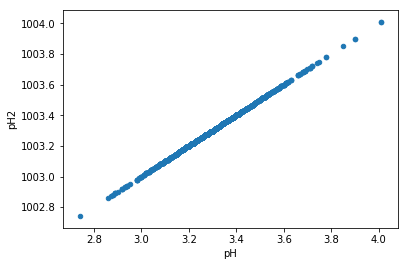

In [17]:
df.plot.scatter(x="pH", y="pH2")

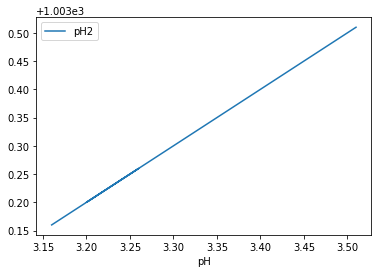

In [18]:
df.head(4).plot.line(x="pH", y="pH2")

In [19]:
df[["pH", "pH2"]].corr()

,pH,pH2
pH,1.0,1.0
pH2,1.0,1.0


In [20]:
# Matrix de correlação
df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']].corr()

,volatile acidity,citric acid,sulphates,alcohol
volatile acidity,1.000000,-0.552496,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.312770,0.109903
sulphates,-0.260987,0.312770,1.000000,0.093595
alcohol,-0.202288,0.109903,0.093595,1.000000


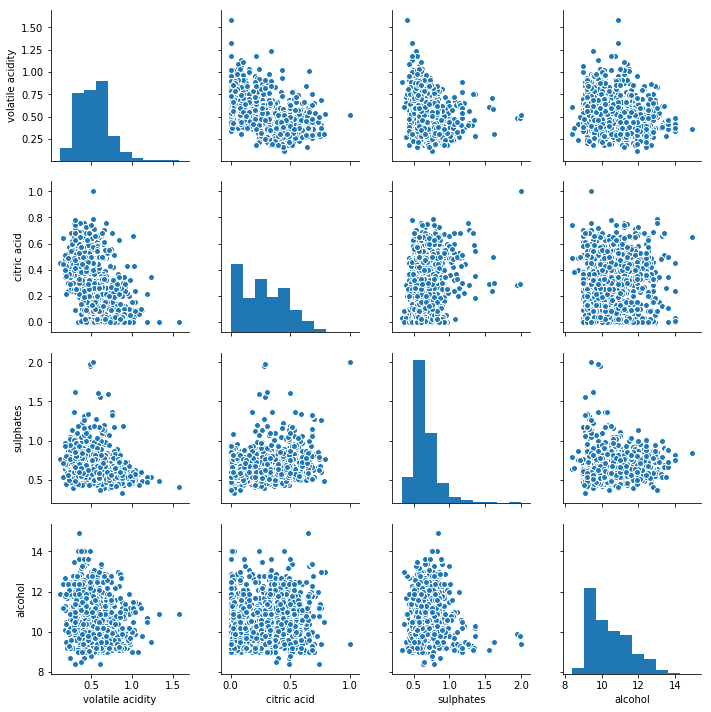

In [21]:
# Pairs plots
sns.pairplot(df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']])

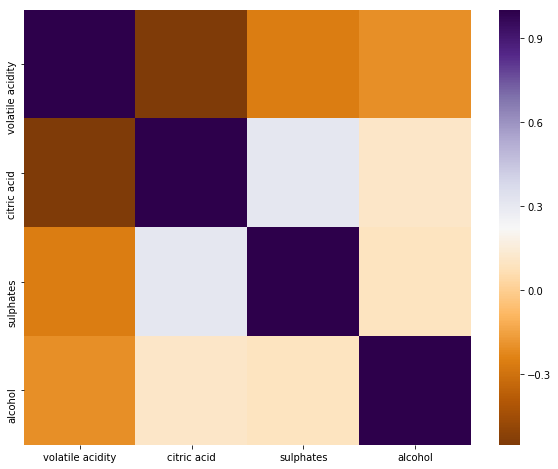

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.heatmap(df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']].corr(method="pearson"), cmap='PuOr')

#### 4. Relacionando os aprendizados

In [23]:
df["is_good_0_or_1"] = 0
df.loc[df.is_good, "is_good_0_or_1"] = 1

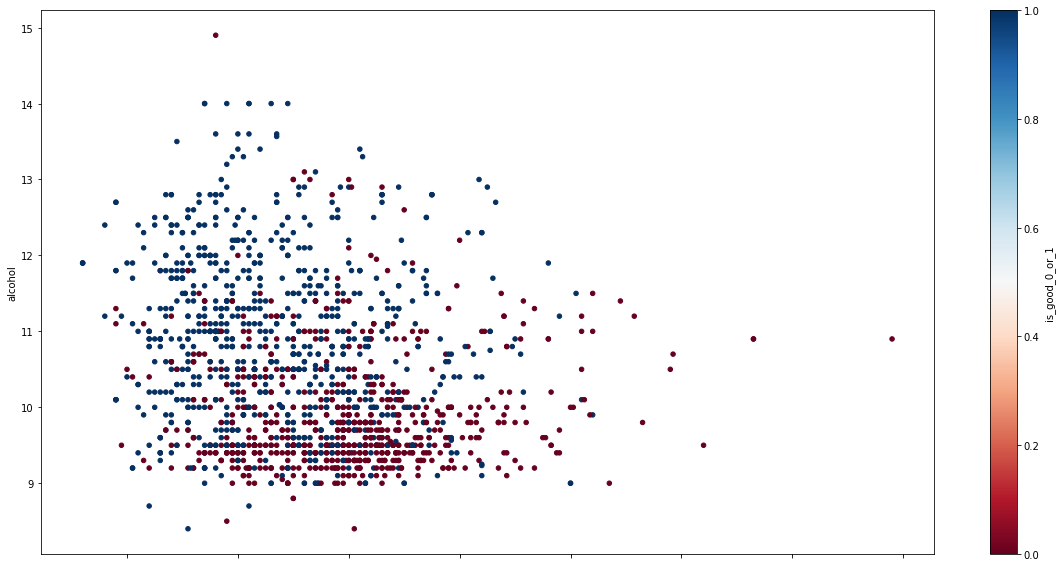

In [24]:
df.plot.scatter(x="volatile acidity", y="alcohol", c="is_good_0_or_1", 
                figsize=(20,10), cmap="RdBu")

### Análise Inferencial: Teste de Hipóteses

#### ♣ Exercícios

Vamos desenhar alguns testes de hipóteses a partir dos dados levantados pela análise descritiva. Depois, vamos decidir qual aceitás-la!

* **Hipótese Nula `(H0)`:** Um vinho com alta acidez volátil não influencia na qualidade de um vinho.
* **Hipótese Alternativa `(H1)`:** Um vinho de má qualidade tem mais acidez volátil que um de boa qualidade.

Outras possibilidades de H0
* A diferença da média entre um vinho de má qualidade e boa qualidade é significante estatisticamente.

In [25]:
df.groupby(["quality"])[["volatile acidity"]].agg(["median", "count", "std"])

volatile acidity                
                  median count       std
quality                                 
3                  0.845    10  0.331256
4                  0.670    53  0.220110
5                  0.580   681  0.164801
6                  0.490   638  0.160962
7                  0.370   199  0.145224
8                  0.370    18  0.144914

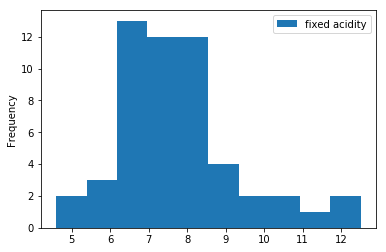

In [26]:
df[df.quality==4][["fixed acidity"]].plot.hist()

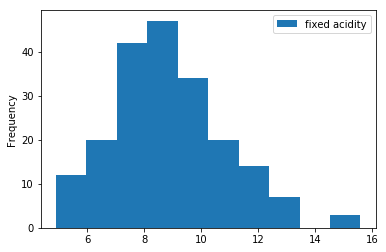

In [27]:
df[df.quality==7][["fixed acidity"]].plot.hist()

In [93]:
from scipy.stats import ttest_ind

cat1 = df[df.quality==4]
cat2 = df[df.quality==7]

ttest_ind(cat1['fixed acidity'], cat2['fixed acidity'])

Ttest_indResult(statistic=-3.6791550255205796, pvalue=0.0002865670730775092)